# Learning

When considering a machine learning problem, we must always think of how much __prior
knowledge__ we have on the problem. Prior knowledge can come in the form of domain
expertise, expert interviews, result of EDAs and simulations, or simply assumptions
that encode our biases into the model. No prior knowledge means that we must train our model without any assumptions.
Complete prior knowledge means that we do not need machine learning, and we can
solve the problem completely by writing a computer program. Machine learning comes
in between these two extremes.

For each situation below, determine whether no prior knowledge, some prior knowledge,
or complete prior knowledge is used to solve the problem. (Don't worry too much about getting this right; the solutions might include some
prior knowledge (e.g. biases) on the part of the author!)

1.  To check whether an integer $n$ is prime, we divide it by all positive integers
$2 \leq d < n$.

2.  To check whether an email is spam or not, we use the labels provided by users
which have identified past emails as spam or not spam.

3. Your stomach is hurting. You remember that six hours ago you ate nachos.
You haven't eaten anything else in the last 12 hours.
So you guess that the nachos must have already been bad when you ate it
(you got food poisoned).

4. Your stomach is hurting. You remember that six hours ago you ate nachos.
You also remember that you presented in front of around 50 important people during
that day. Finally, you remember that you typed four spaces instead of one tab.
You investigate all three possibilities.

5. On the Titanic dataset, you guess, based on your knowledge of western culture, that women and children should have a higher survival rate. Indeed after doing an EDA, your guess is confirmed. During feature engineering, you placed more weight in the gender and age as predictive features of your dataset. 

# Supervised learning

In a supervised learning algorithm, we are given a data set in the form of $(\mathbf{x}_i, y_i)$ where
$\mathbf{x}_i$ is the feature vector of the $i$th training example, and $y_i$ is its corresponding label.

Consider the classification problem of predicting whether an incoming email is spam
or ham (not spam). We are given a training set of emails labeled as spam or ham.
Which of the following statements are true about the features and labels?

1. Adding more features would make our model more accurate, therefore better.
    For example, time/date email was received, number of words in the email,
    number of periods, number of exclamation points, etc.

2. For 100% of spam emails, we saw that "a" was used more than 5 times.
    Thus we classify all emails with "a" used more than 5 times as spam.

3. The labels given to emails in the training set are all true.

4. Assume that we consider the number of times each word appears in the email as features.
Then not all words are equally important as labels. Some words are more predictive, e.g.
"Prince", "Nigeria".

# Train-Test split

In this example, we split a data set into two sets, one for training and one for testing. (This example is from A. Geron, _Hands-On Machine Learning_ (2019) p. 58). Suppose by doing an expert interview, we find that `median_income` in a district is highly predictive of housing prices. We create a new feature which puts districts into 5 categories based on `median_income`.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

housing = pd.read_csv('housing.csv')

# we make a new feature income_cat which simply places an entry into 5 income classes.
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # split 80-20

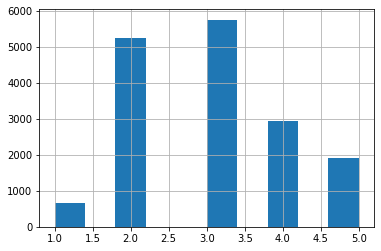

In [43]:
train_set["income_cat"].hist()

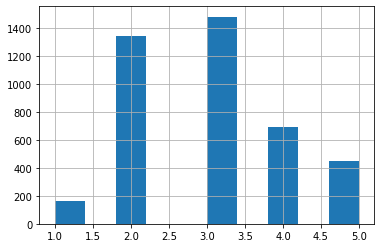

In [44]:
test_set["income_cat"].hist()

Looks okay visually. However, looking at the exact numbers we see that the proportions for the `income_cat` are not the same between the train and test sets.

__Exercise__: Provide the (pandas) code that would give the normalized numerical values of the two histograms above. __HINT:__ The output you should get for the train and test set respectively are:

| | | 
|:-:|:-:|
|3 |   0.35017|
|2 |   0.32116|
|4 |   0.17569|
|5 |   0.11422|
|1 |   0.03876|
|Name:income_cat,| dtype: float64|


And for the test set:

| | | 
|:-:|:-:|
|3 |   0.352229|
|2 |   0.309593|
|4 |   0.178779|
|5 |   0.115310|
|1 |   0.044089|
|Name:income_cat,| dtype: float64|

The test set must simulate what you would encounter in real life. Therefore, the distribution of our train set must be as close as possible to the distribution of the test set. A difference between the distributions of train and test sets is called __sampling bias__. For large data sets, a fully randomized sampling as we did would result in negligible sampling bias. The `housing` dataset contains only 20,640 entries, to counteract sampling bias for this data set one may use a [stratified split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

# Curse of Dimensionality

We use high dimensions for models which require a large number of features.
But there is one problem: we are cursed!
In machine learning, we learn of the __curse of dimensionality__.
Basically, things are sticky in high dimensional spaces -
our intuitions which are adapted to 2D and 3D, fail for 1,000D.
This is one of the motivations for doing dimensionality reduction (e.g. PCA), which
we will learn next week!

In this exercise, we explore one aspect of the curse of dimensionality.
The following problem asks us to find the probability of a random point to lie on the
interior of a $d$-dimensional hypercube, for $d = 2,3, 1000$.

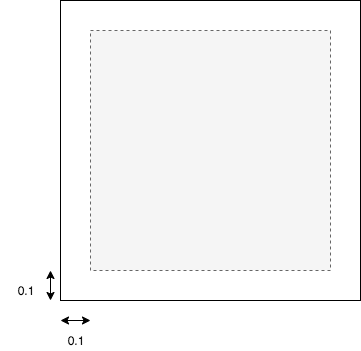

In [7]:
from IPython.display import Image
Image('unit-square.png')

(a) Consider a unit square (1x1 cube in 2-d). What is the probability of finding a random point that is 0.1
units away from all four sides?


(b) Consider a unit cube (1x1x1 cube in 3-d). What is the probability of finding a random point that is 0.1
units away from all six sides?

(c) Consider a unit 1,000-hypercube. What is the probability of finding a random point that
is 0.1 units away from every side of the hypercube?

__HINT__: This can be solved by using principles of probability, or by running simulations in `numpy.random`!

The results must show that for increasing dimensions points are less likely to be
inside a unit cube and more likely to be spread out near the borders.
This can have negative effects for the performance of models. For example, we will see
later that the k-nearest neighbors classifier performs worse for increasing-dimensions.